In [1]:
# Author: Syafi
#importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.decomposition import PCA

# Importing Data

In [2]:
#reading data from scv file into pandas
df = pd.read_csv("input/data_o.csv")
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
#statistical summary of the data
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [4]:
#checking the shape of the data
df.shape

(170653, 19)

In [5]:
#checking for null values
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [6]:
#checking the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

# Data Pre-processing

In [7]:
#selecting columns of interest only
data = df[['valence','acousticness','danceability','energy','instrumentalness','liveness',
          'loudness','popularity','speechiness','tempo', 'year', 'key']]

# data = df[['valence','acousticness','danceability','duration_ms','energy','liveness',
#           'loudness','popularity','tempo', 'mode']

data.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,year,key
0,0.0594,0.982,0.279,0.211,0.878000,0.665,-20.096,4,0.0366,80.954,1921,10
1,0.9630,0.732,0.819,0.341,0.000000,0.160,-12.441,5,0.4150,60.936,1921,7
2,0.0394,0.961,0.328,0.166,0.913000,0.101,-14.850,5,0.0339,110.339,1921,3
3,0.1650,0.967,0.275,0.309,0.000028,0.381,-9.316,3,0.0354,100.109,1921,5
4,0.2530,0.957,0.418,0.193,0.000002,0.229,-10.096,2,0.0380,101.665,1921,3


# PCA

In [8]:
pca = PCA(n_components = 11)
pca.fit(data)

PCA(n_components=11)

In [9]:
print(pca.explained_variance_ratio_)

[5.48986566e-01 3.98113052e-01 3.58318862e-02 1.11379189e-02
 5.78015763e-03 4.66445485e-05 3.63458491e-05 2.93061023e-05
 1.46755687e-05 1.20632135e-05 6.73675639e-06]


In [10]:
pca.get_params(deep = True)

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 11,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [11]:
pca.components_

array([[-6.00200610e-04,  6.62952675e-03, -8.49455320e-04,
        -4.35182128e-03,  2.66292026e-03,  2.52856781e-04,
        -8.48038317e-02, -5.31003673e-01,  7.04326383e-04,
        -5.37346967e-01, -6.49637867e-01, -8.16377012e-04],
       [-1.42368124e-03, -2.47238427e-03,  7.26176124e-04,
         9.21100308e-04, -9.09848792e-04, -2.83521243e-04,
         2.24576630e-02,  3.42453219e-01, -5.37114027e-04,
        -8.42929116e-01,  4.14344234e-01,  3.08884800e-04],
       [ 2.28737209e-03,  2.19430085e-03,  5.47926181e-04,
        -2.08420133e-03, -2.03184809e-03, -8.29942216e-04,
        -3.07826301e-02,  7.74528587e-01, -2.89500700e-04,
         3.28893167e-03, -6.31765287e-01,  3.31350865e-04],
       [-1.88182303e-02,  2.09032071e-02, -8.03652601e-03,
        -3.12469530e-02,  1.91970122e-02, -3.59494541e-03,
        -9.94262111e-01,  2.91753182e-02,  2.05451515e-03,
         2.67422318e-02,  8.43831023e-02, -2.32013601e-02],
       [ 1.28314601e-03, -7.15337142e-04,  7.9092654

In [12]:
# After PCA Cluster
data = df[['acousticness','danceability','energy','instrumentalness',
          'loudness','popularity','speechiness','tempo']]

# data = df[['valence','acousticness','danceability','energy','instrumentalness','liveness',
#           'loudness','popularity','speechiness','tempo', 'year']]

# data.head()

## Data Visualization

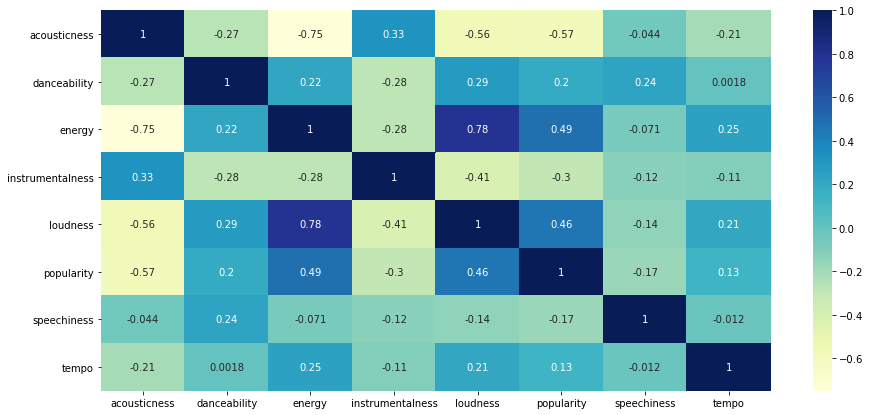

In [13]:
# Pearson correlation between all columns
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Scaling (Nomalize data)

In [14]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(data)
normalized_data = mm.transform(data)

In [15]:
#converting normalize data into dataframe
normalized_data = pd.DataFrame(normalized_data, columns = data.columns)
normalized_data

,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,tempo
0,0.985944,0.282389,0.211,0.878000,0.624916,0.04,0.037732,0.332450
1,0.734940,0.828947,0.341,0.000000,0.744797,0.05,0.427835,0.250243
2,0.964859,0.331984,0.166,0.913000,0.707071,0.05,0.034948,0.453125
3,0.970884,0.278340,0.309,0.000028,0.793736,0.03,0.036495,0.411113
4,0.960843,0.423077,0.193,0.000002,0.781521,0.02,0.039175,0.417503
...,...,...,...,...,...,...,...,...
170648,0.084940,0.795547,0.808,0.000289,0.881654,0.72,0.090825,0.431318
170649,0.206827,0.725709,0.753,0.000000,0.845353,0.68,0.062371,0.566456
170650,0.101406,0.641700,0.858,0.000009,0.904769,0.76,0.083402,0.376531
170651,0.010020,0.679150,0.623,0.000008,0.827484,0.70,0.317526,0.308225


# Training (Clustering)

In [16]:
#Finding the best values for k (number of clusters using elbow method)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
for i in tqdm(range(1,40)):
    km = KMeans(n_clusters = i)
    km.fit(normalized_data)
    inertia.append(km.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [11:26<00:00, 17.60s/it]


In [17]:
err = []
for idx in range(1, len(inertia)):
    err.append(inertia[idx] - inertia[idx - 1])
err

[-31473.014493003844,
 -11574.19007859156,
 -4269.568718008064,
 -3257.008444859832,
 -3068.774728826211,
 -1644.2636269434697,
 -1084.68515179315,
 -942.7779153692645,
 -776.2075354584122,
 -725.2813624950759,
 -475.1251614671164,
 -461.6184437032625,
 -484.1693026055891,
 -395.0385210319182,
 -347.53367613197406,
 -343.7558942661035,
 -327.0813378569619,
 -323.67222447743916,
 -251.3866784445163,
 -242.9359318210045,
 -236.83100119571463,
 -230.6240852594874,
 -193.67757994605563,
 -204.4160292948327,
 -140.91048953837526,
 -202.81717040809053,
 -159.2520162399178,
 -157.97182201240867,
 -138.44746924589163,
 -135.14533099130313,
 -139.56415791660038,
 -104.18461962953552,
 -136.284040747174,
 -102.17725886106746,
 -122.67587989681851,
 -103.32463399878907,
 -95.02146395306772,
 -113.21836269171035]

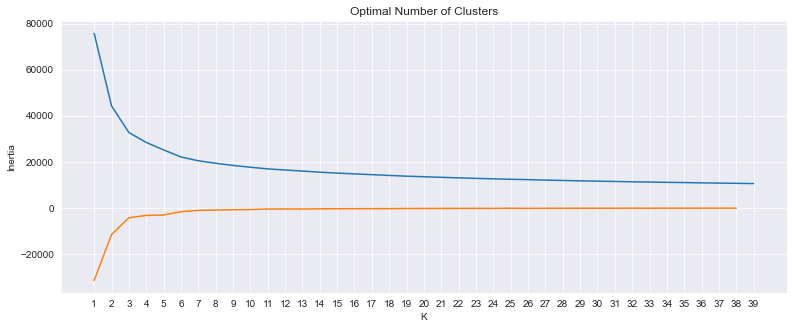

In [18]:
#plotting Elbow plot to find optimal number of clusters
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize = (13,5))
plt.plot(range(1, 40), inertia)
plt.plot(range(1,39), err)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.xticks(list(range(1,40)))
plt.title("Optimal Number of Clusters")
plt.show()

In [19]:
#From the elbow plot the optimal number of clusters are 40
km = KMeans(n_clusters = 40)
km.fit(normalized_data)

KMeans(n_clusters=40)

In [20]:
#predicting the clusters
clusters = km.predict(normalized_data)

In [21]:
#normalizing the clusters
mm.fit(clusters.reshape(-1,1))
clusters = mm.transform(clusters.reshape(-1,1))

In [22]:
#creating a new column cluster in dataframe
df['cluster'] = clusters

# Recommendation function

In [23]:
#function for recommending the songs
def recommendation():
    try:
        song = input("Please enter your favorite song: ")
        num = int(input("Please enter the number of similar songs you want to print: "))
        d = []
#         df_low = 
        song_df = df[df["name"] == song]
        song_df = song_df.select_dtypes(np.number)
        genre = int(song_df['cluster'])
        data = df[df['name'] != song]
        data = data[data['cluster'] == genre]
        data2 = data[data.select_dtypes(np.number).columns]
        diffa = np.array(song_df)
        for i in range(data2.shape[0]):
            diffb = np.array(data2.iloc[i])
            distance = np.linalg.norm(diffa - diffb)
            d.append(distance)
        data['distance'] = d
        data.sort_values(by = "distance", ascending = True, inplace = True)
        data.reset_index(inplace = True)
    
        recommendation = data.loc[1:num]
        print("The similar songs are: ")
        for i in range(1,num+1):
            print(recommendation.loc[i]['name'])
    except:
        print("Enter a valid song")

In [25]:
# Calling the function
recommendation()

Please enter your favorite song: Dead and Gone
Please enter the number of similar songs you want to print: 5
The similar songs are: 
Cassidy
Outside Of A Small Circle Of Friends
Judy
Me And Paul - Live in Texas - September 1974
Out Of Time - Edit Version
